In [1]:
from signal_utils import *

np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT1_signed.txt", LUT1_signed.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT2_signed.txt", LUT2_signed.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT3_signed.txt", LUT3_signed.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT4_signed.txt", LUT4_signed.astype(int), fmt="%d", delimiter=" ")


# Complex Signal

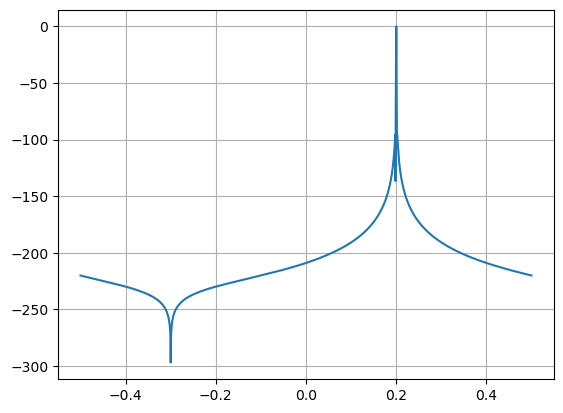

In [7]:
N = 2**12
n = np.arange(N)
F = 0.2
AdB = 100
perc = 0.15
Fmax = 0.5 * (1 - perc)

xi_test = (1 - 2**-11)*np.cos(2*np.pi*F*n)
xq_test = (1 - 2**-11)*np.sin(2*np.pi*F*n)
xiq_test = xi_test + 1j*xq_test

freqs_test, xfftdB_test, an_ = fftdB(xiq_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [8]:
np.savetxt("../../../../VHDL/data/rfTransmitter_test/xin_i_test.txt", xi_test, fmt="%.12f")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/xin_q_test.txt", xq_test, fmt="%.12f")

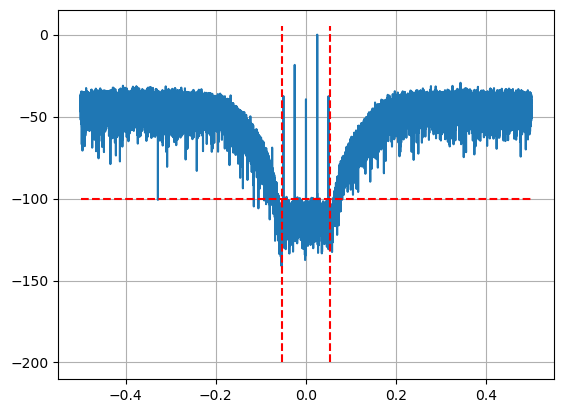

In [12]:
xout_i_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_test.txt", dtype=np.int32)
xout_q_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_test.txt", dtype=np.int32)
xout_iq_test = xout_i_test + 1j*xout_q_test

freq_out_test, xfftdB_out_test, an = fftdB(xout_iq_test, True)
plt.figure()
plt.plot(freq_out_test, xfftdB_out_test)
plt.plot([Fmax/8, Fmax/8], [-200, 5], "--r")
plt.plot([-Fmax/8, -Fmax/8], [-200, 5], "--r")
plt.plot([-0.5, 0.5], [-AdB, -AdB], "--r")
plt.grid()